<a href="https://colab.research.google.com/github/darko-ebenezer/Final-Year-Project/blob/main/Darko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import graphviz
from sklearn import model_selection
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [78]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def compareABunchOfDifferentModelsAccuracy(a, b, c, d):
    """
    compare performance of classifiers on X_train, X_test, Y_train, Y_test
    http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
    http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
    """
    print('\nCompare Multiple Classifiers: \n')
    print('K-Fold Cross-Validation Accuracy: \n')
    names = []
    models = []
    resultsAccuracy = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))
    for name, model in models:
        model.fit(a, b)
        kfold = KFold(n_splits=10, shuffle=True, random_state=7)
        accuracy_results = cross_val_score(model, a, b, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)
    # Boxplot
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()

def defineModels():
    print('\nLR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
    print('GBC = GradientBoostingClassifier \n\n')

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLPClassifier", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

dict_characters = {0: 'Healthy', 1: 'Diabetes'}

In [79]:
dataset = read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


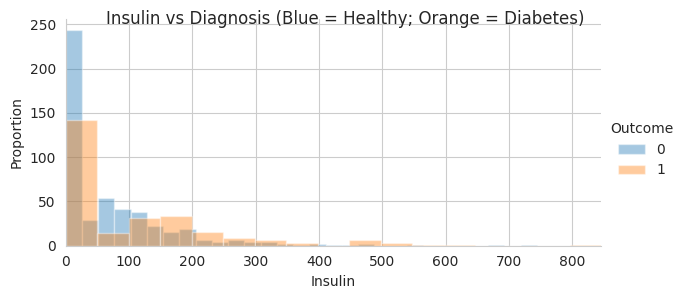

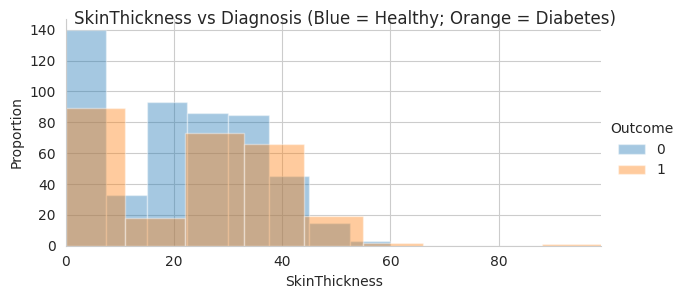

In [80]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.distplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()
plotHistogram(dataset,"Outcome",'Insulin','Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(dataset,"Outcome",'SkinThickness','SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

In [81]:
dataset2 = dataset.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of Null Values\n")
print((dataset2[:] == 0).sum())

# of Rows, # of Columns:  (768, 8)

Column Name           # of Null Values

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [82]:
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name              % Null Values\n")
print(((dataset2[:] == 0).sum())/768*100)

# of Rows, # of Columns:  (768, 8)

Column Name              % Null Values

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64


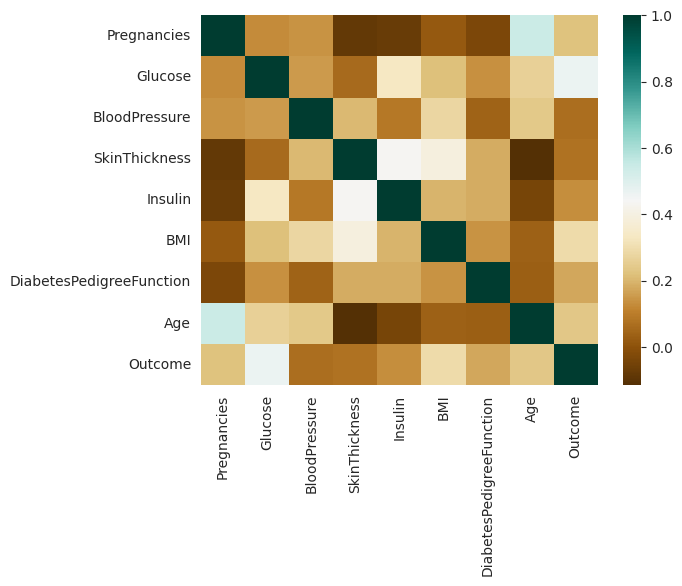

In [83]:
g = sns.heatmap(dataset.corr(),cmap="BrBG",annot=False)

In [84]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


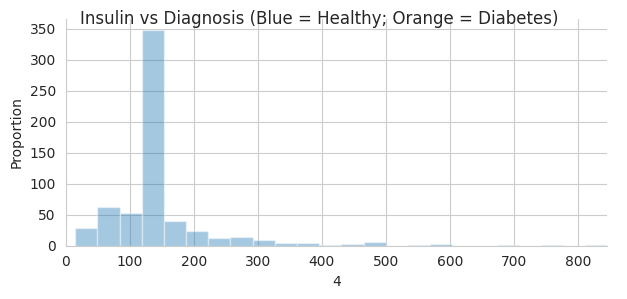

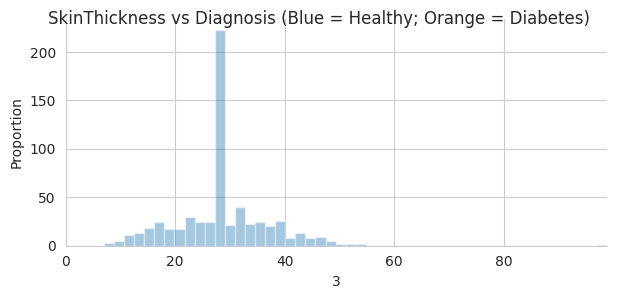

In [85]:
data = read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
imputer = SimpleImputer(missing_values=0,strategy='median')
X_train2 = imputer.fit_transform(X_train)
X_test2 = imputer.transform(X_test)
X_train3 = pd.DataFrame(X_train2)
plotHistogram(X_train3,None,4,'Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(X_train3,None,3,'SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

In [86]:
labels = {0:'Pregnancies',1:'Glucose',2:'BloodPressure',3:'SkinThickness',4:'Insulin',5:'BMI',6:'DiabetesPedigreeFunction',7:'Age'}
print(labels)
print("\nColumn #, # of Zero Values\n")
print((X_train3[:] == 0).sum())

{0: 'Pregnancies', 1: 'Glucose', 2: 'BloodPressure', 3: 'SkinThickness', 4: 'Insulin', 5: 'BMI', 6: 'DiabetesPedigreeFunction', 7: 'Age'}

Column #, # of Zero Values

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64



Compare Multiple Classifiers: 

K-Fold Cross-Validation Accuracy: 

LR: 0.754257 (0.065341)
RF: 0.742729 (0.039852)
KNN: 0.700264 (0.045952)
SVM: 0.747515 (0.040356)
LSVM: 0.763934 (0.051247)
GNB: 0.744342 (0.056777)
DTC: 0.711819 (0.055202)
GBC: 0.758858 (0.055714)


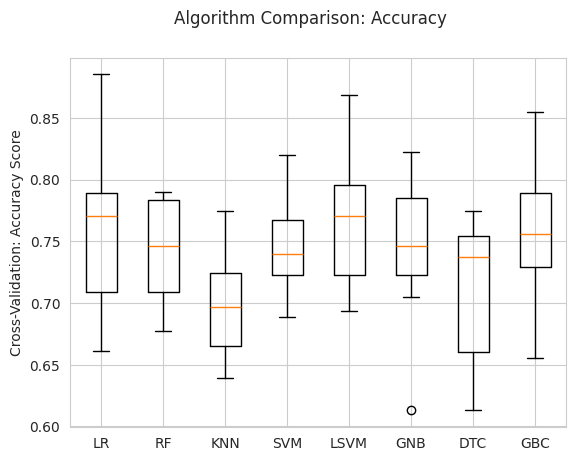


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier
GBC = GradientBoostingClassifier 


   Nearest Neighbors | Accuracy: 71.00% (+/- 7.93%)
          Linear SVM | Accuracy: 76.87% (+/- 2.42%)
             RBF SVM | Accuracy: 74.43% (+/- 3.39%)
    Gaussian Process | Accuracy: 67.09% (+/- 13.55%)
       Decision Tree | Accuracy: 68.08% (+/- 8.70%)
       Random Forest | Accuracy: 76.21% (+/- 7.18%)
       MLPClassifier | Accuracy: 69.06% (+/- 3.26%)
            AdaBoost | Accuracy: 75.89% (+/- 2.52%)
         Naive Bayes | Accuracy: 73.79% (+/- 5.17%)
                 QDA | Accuracy: 74.11% (+/- 4.31%)


In [89]:
compareABunchOfDifferentModelsAccuracy(X_train2, y_train, X_test2, y_test)
defineModels()
results = {}
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train2, y_train, cv=5)
    results[name] = scores
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

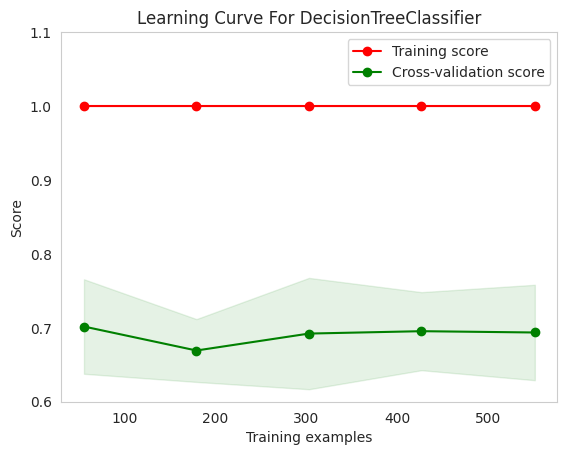

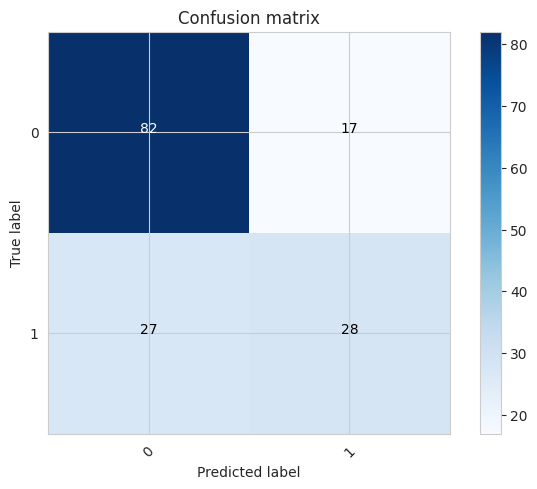

DecisionTreeClassifier - Training set accuracy: 0.6857482813326283 (0.05760654801756132)


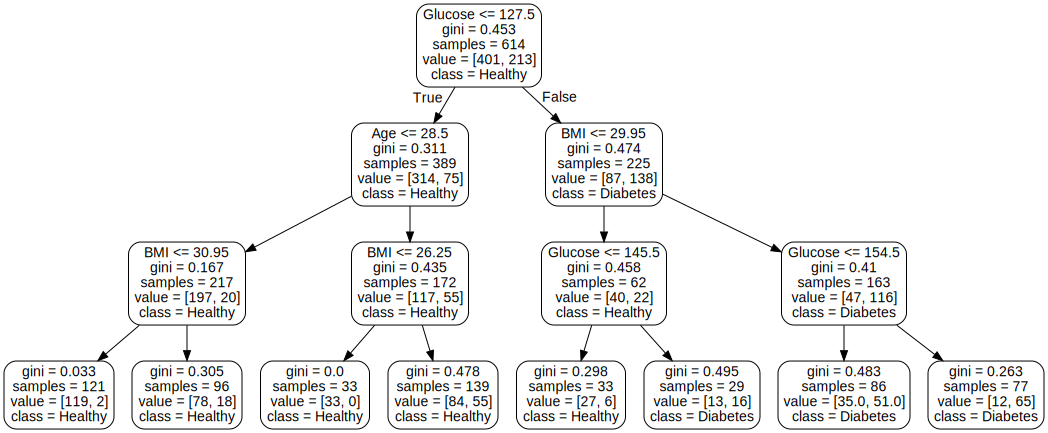

In [90]:
def runDecisionTree(a, b, c, d):
    model = DecisionTreeClassifier()
    accuracy_scorer = make_scorer(accuracy_score)
    model.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
    accuracy = model_selection.cross_val_score(model, a, b, cv=kfold, scoring='accuracy')
    mean = accuracy.mean()
    stdev = accuracy.std()
    prediction = model.predict(c)
    cnf_matrix = confusion_matrix(d, prediction)
    #plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')
    plot_learning_curve(model, 'Learning Curve For DecisionTreeClassifier', a, b, (0.60,1.1), 10)
    #learning_curve(model, 'Learning Curve For DecisionTreeClassifier', a, b, (0.60,1.1), 10)
    plt.show()
    plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
    plt.show()
    print('DecisionTreeClassifier - Training set accuracy: %s (%s)' % (mean, stdev))
    return
runDecisionTree(X_train2, y_train, X_test2, y_test)
feature_names1 = X.columns.values
def plot_decision_tree1(a,b):
    dot_data = tree.export_graphviz(a, out_file=None,
                             feature_names=b,
                             class_names=['Healthy','Diabetes'],
                             filled=False, rounded=True,
                             special_characters=False)
    graph = graphviz.Source(dot_data)
    return graph
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(X_train2, y_train)
plot_decision_tree1(clf1,feature_names1)

In [91]:
feature_names = X.columns.values
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(X_train2, y_train)
print('Accuracy of DecisionTreeClassifier: {:.2f}'.format(clf1.score(X_test2, y_test)))
columns = X.columns
coefficients = clf1.feature_importances_.reshape(X.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('DecisionTreeClassifier - Feature Importance:')
print('\n',fullList,'\n')

feature_names = X.columns.values
clf2 = RandomForestClassifier(max_depth=3,min_samples_leaf=12)
clf2.fit(X_train2, y_train)
print('Accuracy of RandomForestClassifier: {:.2f}'.format(clf2.score(X_test2, y_test)))
columns = X.columns
coefficients = clf2.feature_importances_.reshape(X.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('RandomForestClassifier - Feature Importance:')
print('\n',fullList,'\n')

clf3 = XGBClassifier()
clf3.fit(X_train2, y_train)
print('Accuracy of XGBClassifier: {:.2f}'.format(clf3.score(X_test2, y_test)))
columns = X.columns
coefficients = clf3.feature_importances_.reshape(X.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('XGBClassifier - Feature Importance:')
print('\n',fullList,'\n')

Accuracy of DecisionTreeClassifier: 0.78
DecisionTreeClassifier - Feature Importance:

                    Variable  absCoefficient
1                   Glucose        0.645256
5                       BMI        0.247421
7                       Age        0.107322
0               Pregnancies        0.000000
3             SkinThickness        0.000000
2             BloodPressure        0.000000
4                   Insulin        0.000000
6  DiabetesPedigreeFunction        0.000000 

Accuracy of RandomForestClassifier: 0.76
RandomForestClassifier - Feature Importance:

                    Variable  absCoefficient
1                   Glucose        0.350853
5                       BMI        0.170185
4                   Insulin        0.144578
7                       Age        0.126843
0               Pregnancies        0.074874
6  DiabetesPedigreeFunction        0.072458
3             SkinThickness        0.048101
2             BloodPressure        0.012108 

Accuracy of XGBClassifier: 0